In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import scipy
import math
import matplotlib.pyplot as plt

In [36]:
mean = 20
std_dev = 5
d1 = np.random.normal(mean,std_dev,1000)

In [37]:
def manual_mu(d1): # defining a function to calculate average/mean
    numer = sum(d1)
    denom = len(d1)
    return numer/denom

In [38]:
def manual_sdev(d1): # defining a function to caculate standard deviation/sigma
    denom1 = len(d1)
    mean1 = manual_mu(d1)
    numer1 = sum(np.power((d1-mean),2))
    return math.sqrt(numer1/denom1)

In [100]:
print('Our mean: ', manual_mu(d1)) # verifying results from both approaches
print('Machine mean: ', np.mean(d1))
print('Our sigma: ', manual_sdev(d1))
print('Machine sigma: ', np.std(d1))

Our mean:  20.239591449910282
Machine mean:  20.23959144991027
Our sigma:  4.971501655839313
Machine sigma:  4.965724987465868


In [40]:
import scipy.stats
avg,dev = scipy.stats.norm.fit(d1) # one line of code to calculate mean and standard deviation
print(avg, dev)

20.23959144991027 4.965724987465868


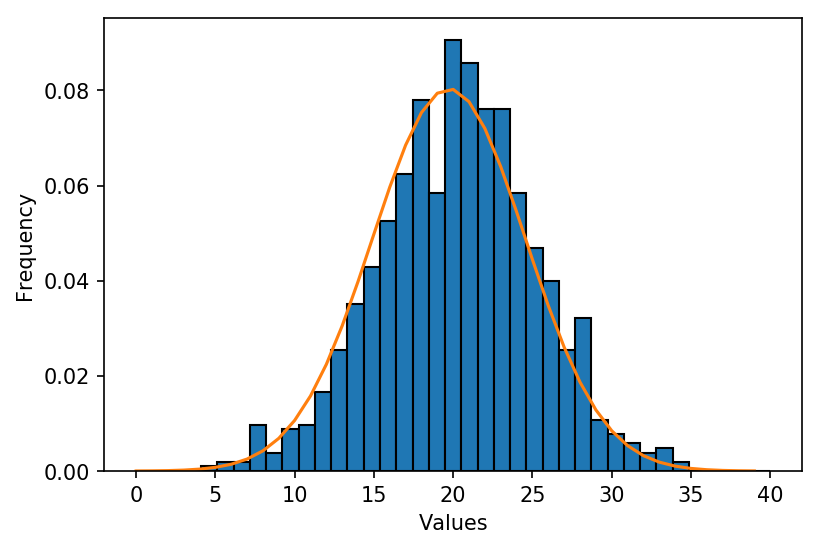

In [54]:
x = np.linspace(0,40,40) # fitting the data in a normal distribution
plt.hist(d1,bins=x,normed=True,edgecolor = 'black')
plt.plot(scipy.stats.norm.pdf(x,loc=avg,scale=dev))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.rcParams['figure.dpi']=150; # increasing the size of the visualization

In [66]:
def manual_lambda(d1): # manual calculating lambda
    numer2 = sum(d1)
    denom2 = len(d1)
    return numer2/denom2

In [83]:
tru_lambda = 5 
Y = np.random.exponential(tru_lambda,1000) # creating a data set to visualize an exponential distribution

In [84]:
manual_lambda(Y)

4.630640987033258

In [101]:
_, l = scipy.stats.expon.fit(Y,floc=0) # using scipy built-in lambda fuction
l

4.630640987033265

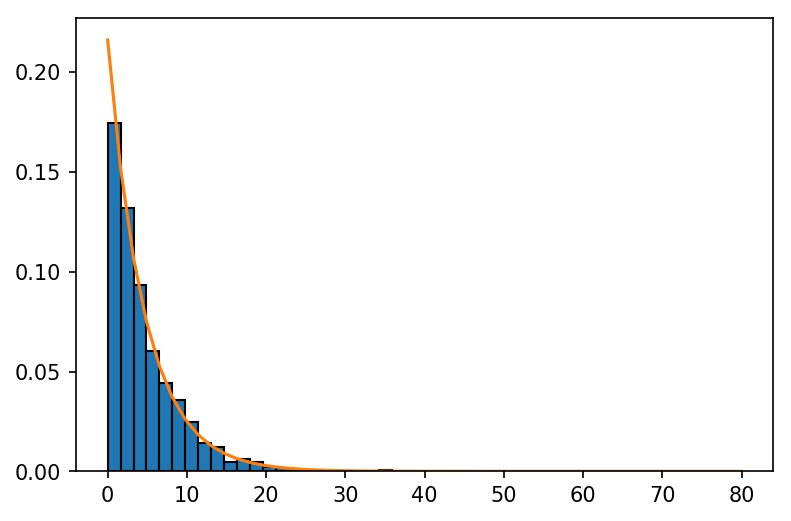

In [95]:
a = np.linspace(0,80)
plt.hist(Y,bins=a,normed=True,edgecolor = 'black')
plt.plot(a,scipy.stats.expon.pdf(a,scale=l));

In [87]:
tsla = pdr.get_data_yahoo('TSLA', start = '2014-1-1', end = '2015-1-1')
tsla = tsla['Close']
tsla_ret = tsla.pct_change()[1:]

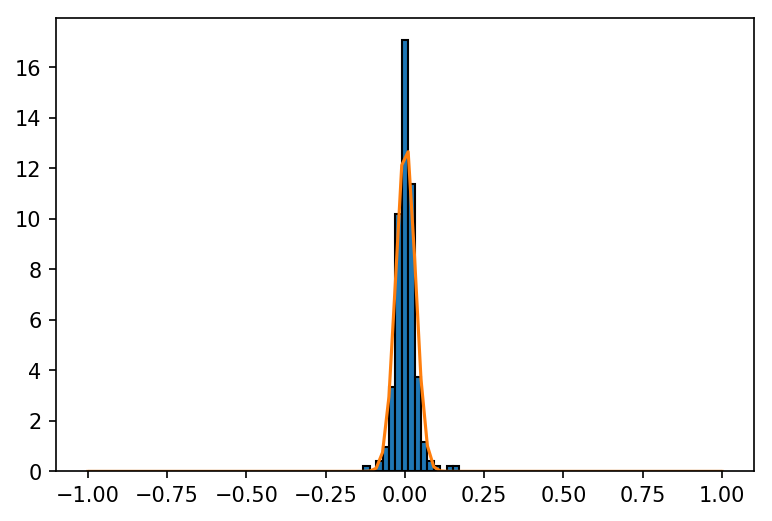

In [91]:
mu1, sdev1 = scipy.stats.norm.fit(tsla_ret) # fitting tesla's stock return in a normal distribution
pdf = scipy.stats.norm.pdf
x = np.linspace(-1,1,num=100)
plt.hist(tsla_ret,bins=x,normed='True',edgecolor='black')
plt.plot(x,pdf(x,loc=mu1,scale=sdev1));

In [96]:
from statsmodels.stats.stattools import jarque_bera

In [98]:
_, pval, skewness, kurtosis = jarque_bera(tsla_ret)
print('The p-value is: ', pval)
print('Is the null hypothesis rejected :', pval < 0.01)
print('The Skewness is: ', skewness)
print('The kurtosis is :', kurtosis)

The p-value is:  1.2795703807752614e-55
Is the null hypothesis rejected : True
The Skewness is:  0.7572544548705418
The kurtosis is : 7.6670789321690105
